In [96]:
from common import sns_cm, get_set, display_accuracy, scatter_plot
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

##### Change directories and load Lab 1

# Classification of different positions

#### We will use the K-nearest neighbor algorithm and decision trees in this lab. In this part you should only work with the movement positions:
- Squats
- Jumping
- Running
- Walking

In [97]:
movement_positions : list[str] = ['Squats', 'Jumping', 'Running', 'Walking']

In [98]:
training_sets = get_set(positions=movement_positions, folder='Class Dataframes')
testing_sets = get_set(positions=movement_positions, folder='Test')

In [99]:
testing_set = pd.concat(testing_sets, axis='rows', ignore_index=True)
df = pd.concat(training_sets, axis='rows', ignore_index=True)

#### We start with working with the KNN algorithm. You should use crossvalidation for evaluating the model.

In [100]:
knn = KNeighborsClassifier()

In [101]:
df

,ax,ay,az,gx,gy,gz,class
0,-2.837289,-16.732111,-5.967700,1.946007,1.308435,0.363760,Jumping
1,-2.212464,-14.917455,-4.124329,1.974106,1.288888,0.380863,Jumping
2,-1.274178,-13.732409,-2.247459,1.916686,1.043327,0.395524,Jumping
3,-0.354736,-12.463615,-0.779761,1.811620,0.621843,0.391859,Jumping
4,0.516850,-11.177772,0.309571,1.704111,0.091474,0.361316,Jumping
...,...,...,...,...,...,...,...
18425,1.924428,-9.722338,0.285643,0.574349,0.309394,0.107509,Walking
18426,1.883750,-9.856336,0.304786,0.590231,0.364370,0.094070,Walking
18427,1.603789,-9.856336,-0.059222,0.619552,0.445002,0.069637,Walking
18428,0.997807,-9.717552,-0.679263,0.646429,0.523191,0.047646,Walking


In [102]:
X = df.drop('class', axis='columns')
y = df['class']

In [103]:
X

,ax,ay,az,gx,gy,gz
0,-2.837289,-16.732111,-5.967700,1.946007,1.308435,0.363760
1,-2.212464,-14.917455,-4.124329,1.974106,1.288888,0.380863
2,-1.274178,-13.732409,-2.247459,1.916686,1.043327,0.395524
3,-0.354736,-12.463615,-0.779761,1.811620,0.621843,0.391859
4,0.516850,-11.177772,0.309571,1.704111,0.091474,0.361316
...,...,...,...,...,...,...
18425,1.924428,-9.722338,0.285643,0.574349,0.309394,0.107509
18426,1.883750,-9.856336,0.304786,0.590231,0.364370,0.094070
18427,1.603789,-9.856336,-0.059222,0.619552,0.445002,0.069637
18428,0.997807,-9.717552,-0.679263,0.646429,0.523191,0.047646


In [104]:
y

0        Jumping
1        Jumping
2        Jumping
3        Jumping
4        Jumping
          ...   
18425    Walking
18426    Walking
18427    Walking
18428    Walking
18429    Walking
Name: class, Length: 18430, dtype: object

##### Make a choice of the number of subsets that you use for your crossvalidation. Motivate the choice

In [105]:
folds = KFold(n_splits=40)

#### For the gridsearch use GridSearchCV which you find in the previous weeks ́ exercise. The hyperparameter you will use for the gridsearch is k, that is the number of neighbours.

##### Make a choice of the range of k-values you will use. Motivate the choice.
Too large K values will 'classify' each instance of 'df'.

In [106]:
k_range = list(range(1, 50))

##### Split data

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

##### Train the model.

In [108]:
grid = GridSearchCV(estimator=knn,
                    param_grid=dict(n_neighbors=k_range),
                    cv=folds,
                    scoring='accuracy',
                    return_train_score=False)

In [109]:
grid_search = grid.fit(X=X_train, y=y_train)

##### What is the optimal k-value?

In [110]:
grid.best_params_

{'n_neighbors': 3}

##### What is the accuracy?

In [111]:
grid.best_score_

0.9105425945563803

In [112]:
scores = pd.DataFrame(grid.cv_results_)

##### Display scores

In [113]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017201,0.007135,0.008776,0.001391,1,{'n_neighbors': 1},0.883469,0.897019,0.894309,0.872629,...,0.910326,0.902174,0.913043,0.899457,0.918478,0.929348,0.875000,0.906944,0.018181,4
1,0.014727,0.000856,0.008332,0.000701,2,{'n_neighbors': 2},0.883469,0.864499,0.897019,0.842818,...,0.904891,0.891304,0.899457,0.891304,0.902174,0.915761,0.866848,0.895279,0.018729,16
2,0.014202,0.000728,0.008012,0.000697,3,{'n_neighbors': 3},0.902439,0.894309,0.907859,0.878049,...,0.934783,0.907609,0.921196,0.907609,0.923913,0.923913,0.885870,0.910543,0.016907,1
3,0.014366,0.000605,0.008244,0.000486,4,{'n_neighbors': 4},0.913279,0.880759,0.905149,0.875339,...,0.929348,0.899457,0.932065,0.896739,0.918478,0.918478,0.877717,0.906677,0.016236,5
4,0.014407,0.000864,0.008207,0.000573,5,{'n_neighbors': 5},0.902439,0.883469,0.897019,0.880759,...,0.932065,0.910326,0.918478,0.902174,0.918478,0.923913,0.883152,0.908439,0.015175,2
5,0.014251,0.000702,0.008448,0.001351,6,{'n_neighbors': 6},0.905149,0.878049,0.897019,0.867209,...,0.918478,0.904891,0.923913,0.902174,0.915761,0.923913,0.899457,0.906946,0.015755,3
6,0.014202,0.000543,0.008414,0.000556,7,{'n_neighbors': 7},0.899729,0.878049,0.883469,0.861789,...,0.926630,0.913043,0.913043,0.902174,0.896739,0.926630,0.891304,0.905249,0.017189,6
7,0.014277,0.000602,0.008575,0.000632,8,{'n_neighbors': 8},0.888889,0.883469,0.894309,0.859079,...,0.913043,0.902174,0.926630,0.899457,0.899457,0.918478,0.880435,0.901724,0.017256,8
8,0.014221,0.000497,0.008984,0.000780,9,{'n_neighbors': 9},0.905149,0.883469,0.880759,0.864499,...,0.918478,0.910326,0.913043,0.899457,0.899457,0.915761,0.885870,0.903350,0.016409,7
9,0.014239,0.000604,0.008832,0.000669,10,{'n_neighbors': 10},0.897019,0.869919,0.888889,0.861789,...,0.910326,0.894022,0.918478,0.894022,0.894022,0.913043,0.880435,0.900569,0.017789,9


##### Plot the accuracy as a function of the k-value. You need to extract that information from the model. How sensitive is the performance of the model for different k-values?

In [114]:
mean_test_score = scores['mean_test_score']

In [115]:
mean_test_score

0     0.906944
1     0.895279
2     0.910543
3     0.906677
4     0.908439
5     0.906946
6     0.905249
7     0.901724
8     0.903350
9     0.900569
10    0.899144
11    0.898738
12    0.897653
13    0.896160
14    0.895349
15    0.895822
16    0.893923
17    0.893922
18    0.892701
19    0.891277
20    0.890733
21    0.888633
22    0.889581
23    0.887480
24    0.887276
25    0.886191
26    0.886327
27    0.884699
28    0.884156
29    0.882257
30    0.882800
31    0.880970
32    0.880630
33    0.879341
34    0.879342
35    0.877916
36    0.877035
37    0.876830
38    0.875814
39    0.875204
40    0.874187
41    0.873576
42    0.873170
43    0.871746
44    0.871678
45    0.870998
46    0.870524
47    0.869981
48    0.869506
Name: mean_test_score, dtype: float64

<Axes: title={'center': 'Accuracy'}, xlabel='k'>

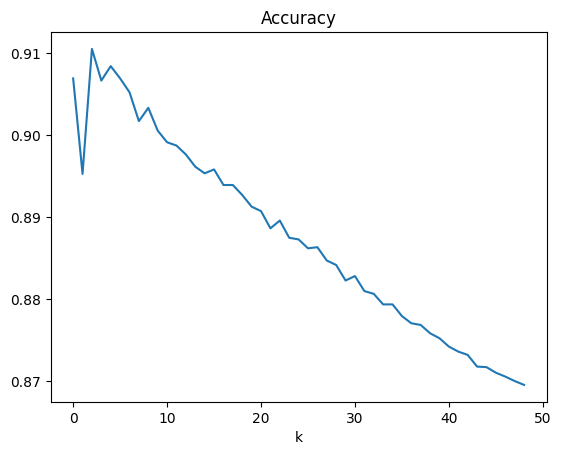

In [116]:
mean_test_score.plot(title = 'Accuracy', xlabel='k')

#### Now it is time to look at the test set with the optimal k-value

##### Use the model on the test set and acquire both the accuracy and the plot the confusion matrix

In [117]:
y_pred = grid.predict(X=X_test)

In [118]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9148128052088985

In [119]:
X_test_sample = testing_set.drop('class', axis='columns')
y_true_sample = testing_set['class']
y_test_pred = grid.predict(X=X_test_sample)

In [120]:
display_accuracy(accuracy_score(y_true=y_test, y_pred=y_pred), accuracy_score(y_true=y_true_sample, y_pred=y_test_pred))

Validation set accuracy: 0.9148128052088985
Test set accuracy: 0.8637917005695688


##### Explain the result in the confusion matrix

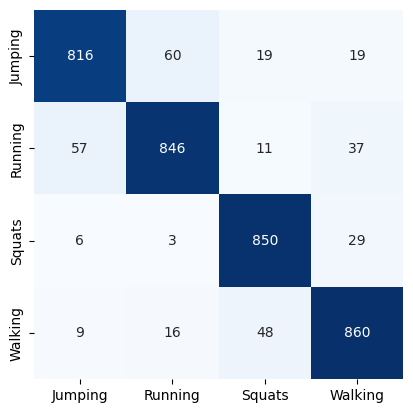

In [121]:
sns_cm(y_test, y_pred)

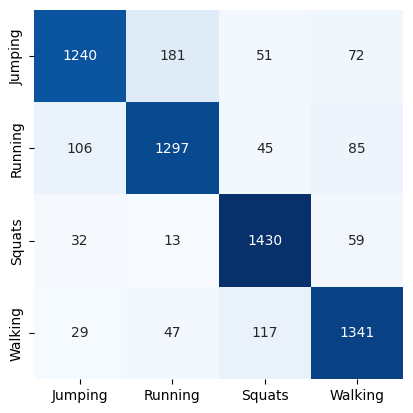

In [122]:
sns_cm(y_true_sample, y_test_pred)

##### Scatter plot of training sets


<Axes: xlabel='ax', ylabel='ay'>

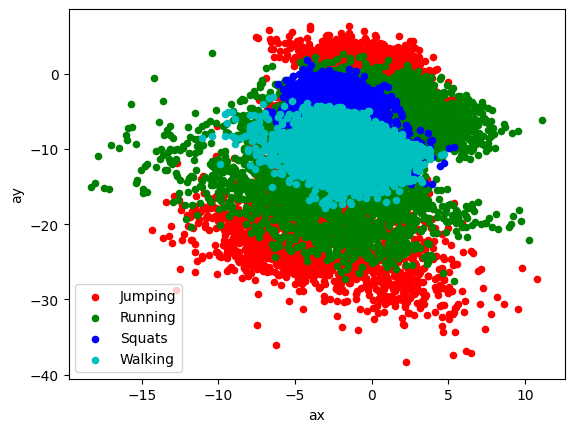

In [123]:
scatter_plot(training_sets)

##### Scatter plot of testing sets


<Axes: xlabel='ax', ylabel='ay'>

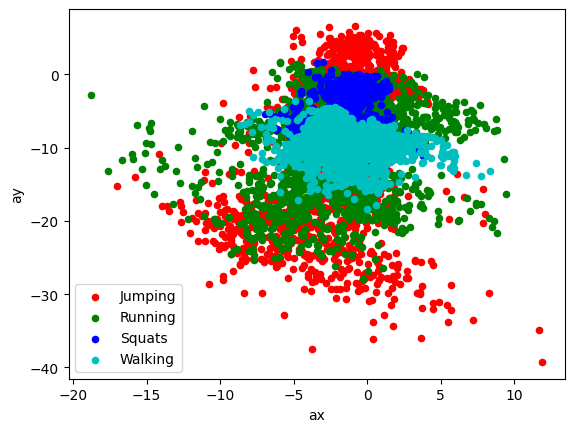

In [124]:
scatter_plot(testing_sets)